**VGG 실습**

In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


In [3]:
def vgg16(input_shape = (244, 244, 3)):
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Conv2D(input_shape = input_shape, filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
  model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))

  model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
  model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))

  model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
  model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
  model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))

  model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
  model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
  model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))

  model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
  model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
  model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))

  #fully connected
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(4096, activation='relu'))
  model.add(tf.keras.layers.Dense(4096, activation='relu'))
  model.add(tf.keras.layers.Dense(10, activation='softmax'))

  return model

In [4]:
vgg_cifar10 = vgg16(input_shape=(32, 32, 3))

opt = tf.keras.optimizers.Adam(learning_rate=0.0002)
vgg_cifar10.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])

vgg_cifar10.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         2

Cifar-10 Dataset split

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=123)

In [6]:
# one-hot encoding 변환
y_train = tf.squeeze(tf.one_hot(y_train, 10), axis=1)
y_valid = tf.squeeze(tf.one_hot(y_valid, 10), axis=1)
y_test = tf.squeeze(tf.one_hot(y_test, 10), axis=1)

In [7]:
history = vgg_cifar10.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
1250/1250 [==============================] - 45s 36ms/step - loss: 1.9015 - acc: 0.2383 - val_loss: 1.6153 - val_acc: 0.3445
Epoch 2/20
1250/1250 [==============================] - 44s 35ms/step - loss: 1.4601 - acc: 0.4369 - val_loss: 1.3484 - val_acc: 0.5158
Epoch 3/20
1250/1250 [==============================] - 44s 35ms/step - loss: 1.1051 - acc: 0.6025 - val_loss: 1.0015 - val_acc: 0.6507
Epoch 4/20
1250/1250 [==============================] - 44s 35ms/step - loss: 0.8665 - acc: 0.6966 - val_loss: 0.8521 - val_acc: 0.7113
Epoch 5/20
1250/1250 [==============================] - 44s 35ms/step - loss: 0.6985 - acc: 0.7574 - val_loss: 0.8028 - val_acc: 0.7281
Epoch 6/20
1250/1250 [==============================] - 44s 35ms/step - loss: 0.5625 - acc: 0.8082 - val_loss: 0.7988 - val_acc: 0.7454
Epoch 7/20
1250/1250 [==============================] - 44s 35ms/step - loss: 0.4577 - acc: 0.8467 - val_loss: 0.7944 - val_acc: 0.7461
Epoch 8/20
1250/1250 [==========================

In [8]:
import matplotlib.pyplot as plt

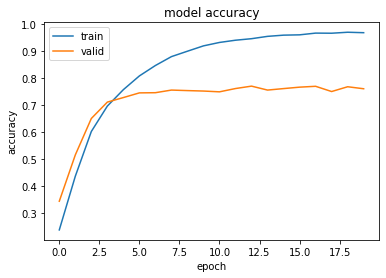

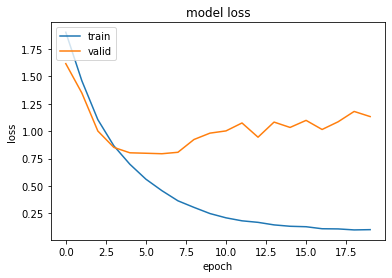

In [9]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
import numpy as np
results = vgg_cifar10.evaluate(x_test, y_test, batch_size=32)

print('test accuracy')
print(results[1])

In [11]:
# resnet
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import numpy as np

In [13]:
imgs = np.load('drive/MyDrive/imgs.npy')
labels = np.load('drive/MyDrive/labels.npy')

print(imgs.shape)
print(labels.shape)

(1080, 299, 299, 3)
(1080,)


In [14]:
import cv2
print(cv2.__version__)

#resize (299, 299) -> (32, 32)
x_train = []
for idx in range(len(imgs)):
  print('\r start', idx+1, '/', len(imgs), end='')
  img = imgs[idx]
  img = cv2.resize(img, (32, 32))
  x_train.append(img)
print() #end

x_train = np.array(x_train)
print(x_train.shape)

4.1.2
 start 1080 / 1080
(1080, 32, 32, 3)


In [15]:
base_model = tf.keras.applications.ResNet50(weights='imagenet', input_shape=(224, 224, 3))
base_model = tf.keras.models.Model(base_model.inputs, base_model.layers[-2].output)
# base_model.trainable = False
x = base_model.output
pred = tf.keras.layers.Dense(9, activation='softmax')(x)
model = tf.keras.models.Model(inputs=base_model.input, outputs=pred)

opt = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [16]:
y_train = np.reshape(labels, newshape=(len(labels), 1))
print(y_train.shape)

(1080, 1)


In [17]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=123)

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=123)

In [18]:
y_train = tf.squeeze(tf.one_hot(y_train, 9), axis=1)
y_valid = tf.squeeze(tf.one_hot(y_valid, 9), axis=1)
y_test = tf.squeeze(tf.one_hot(y_test, 9), axis=1)

print('train data')
print(x_train.shape)
print(y_train.shape)

print('validation data')
print(x_valid.shape)
print(y_valid.shape)

print('test data')
print(x_test.shape)
print(y_test.shape)

train data
(691, 32, 32, 3)
(691, 9)
validation data
(216, 32, 32, 3)
(216, 9)
test data
(173, 32, 32, 3)
(173, 9)


In [19]:
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
22/22 [==============================] - 2s 102ms/step - loss: 2.3935 - acc: 0.3329 - val_loss: 2.4302 - val_acc: 0.4352
Epoch 2/20
22/22 [==============================] - 1s 39ms/step - loss: 1.2048 - acc: 0.6599 - val_loss: 5.1590 - val_acc: 0.4583
Epoch 3/20
22/22 [==============================] - 1s 38ms/step - loss: 0.8635 - acc: 0.7699 - val_loss: 3.1707 - val_acc: 0.4769
Epoch 4/20
22/22 [==============================] - 1s 39ms/step - loss: 0.4871 - acc: 0.8741 - val_loss: 1.5788 - val_acc: 0.5324
Epoch 5/20
22/22 [==============================] - 1s 38ms/step - loss: 0.3744 - acc: 0.9219 - val_loss: 2.7675 - val_acc: 0.5324
Epoch 6/20
22/22 [==============================] - 1s 39ms/step - loss: 0.2168 - acc: 0.9450 - val_loss: 1.5573 - val_acc: 0.5602
Epoch 7/20
22/22 [==============================] - 1s 39ms/step - loss: 0.2030 - acc: 0.9465 - val_loss: 3.3261 - val_acc: 0.5370
Epoch 8/20
22/22 [==============================] - 1s 38ms/step - loss: 0.1605 - 

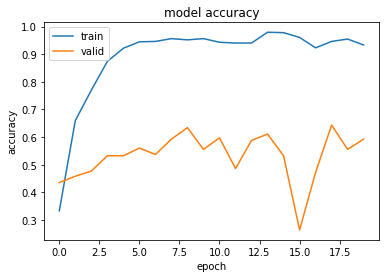

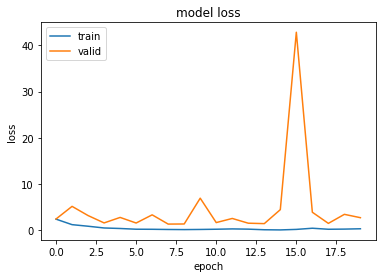

In [20]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [21]:
print('validation accuracy')
print(history.history['val_acc'][-1])
print(np.max(history.history['val_acc']))

validation accuracy
0.5925925970077515
0.6435185074806213


In [22]:
results = model.evaluate(x_test, y_test, batch_size=32)

print('test accuracy')
print(results[1])

6/6 [==============================] - 0s 34ms/step - loss: 2.7495 - acc: 0.5434
test accuracy
0.5433526039123535


In [23]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [24]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=123)

In [25]:
# one-hot encoding 변환
y_train = tf.squeeze(tf.one_hot(y_train, 10), axis=1)
y_valid = tf.squeeze(tf.one_hot(y_valid, 10), axis=1)
y_test = tf.squeeze(tf.one_hot(y_test, 10), axis=1)

print('train data')
print(x_train.shape)
print(y_train.shape)

print('validation data')
print(x_valid.shape)
print(y_valid.shape)

print('test data')
print(x_test.shape)
print(y_test.shape)

train data
(40000, 32, 32, 3)
(40000, 10)
validation data
(10000, 32, 32, 3)
(10000, 10)
test data
(10000, 32, 32, 3)
(10000, 10)


In [26]:
base_model = tf.keras.applications.InceptionV3(weights=None, input_shape=(75, 75, 3))
base_model = tf.keras.models.Model(base_model.inputs, base_model.layers[-2].output)
x = base_model.output
pred = tf.keras.layers.Dense(10, activation='softmax')(x)
model = tf.keras.models.Model(inputs=base_model.input, outputs=pred)

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 37, 37, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 37, 37, 32)   96          conv2d_13[0][0]                  
__________________________________________________________________________________________________
activation (Activation)         (None, 37, 37, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [27]:
x_data = []
for i in range(len(x_train)):
  img = cv2.resize(x_train[i], (75, 75))
  x_data.append(img)

x_train = np.array(x_data)

x_data = []
for i in range(len(x_valid)):
  img = cv2.resize(x_valid[i], (75, 75))
  x_data.append(img)

x_valid = np.array(x_data)

x_data = []
for i in range(len(x_test)):
  img = cv2.resize(x_test[i], (75, 75))
  x_data.append(img)

x_test = np.array(x_data)


print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)

(40000, 75, 75, 3)
(10000, 75, 75, 3)
(10000, 75, 75, 3)


In [28]:
base_model = tf.keras.applications.InceptionV3(weights=None, input_shape=(75, 75, 3))
base_model = tf.keras.models.Model(base_model.inputs, base_model.layers[-2].output)
x = base_model.output
pred = tf.keras.layers.Dense(10, activation='softmax')(x)
model = tf.keras.models.Model(inputs=base_model.input, outputs=pred)

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "functional_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_107 (Conv2D)             (None, 37, 37, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 37, 37, 32)   96          conv2d_107[0][0]                 
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 37, 37, 32)   0           batch_normalization_94[0][0]     
______________________________________________________________________________________

In [ ]:
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
1250/1250 [==============================] - 69s 55ms/step - loss: 1.9214 - acc: 0.3277 - val_loss: 11.4190 - val_acc: 0.3094
Epoch 2/10
1250/1250 [==============================] - 67s 54ms/step - loss: 1.6581 - acc: 0.4361 - val_loss: 652.4818 - val_acc: 0.0979
Epoch 3/10
1250/1250 [==============================] - 68s 54ms/step - loss: 1.7337 - acc: 0.4223 - val_loss: 2.5910 - val_acc: 0.4690
Epoch 4/10
 398/1250 [========>.....................] - ETA: 42s - loss: 1.5993 - acc: 0.4604

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
print('validation accuracy')
print(history.history['val_acc'][-1])
print(np.max(history.history['val_acc']))

results = model.evaluate(x_test, y_test, batch_size=32)

print('test accuracy')
print(results[1])

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

print('train data')
print(x_train.shape)
print(y_train.shape)

print('test data')
print(x_test.shape)
print(y_test.shape)

In [ ]:
print(y_test[:10, :])

In [ ]:
print(y_train[:10, :])

In [ ]:
base_model = tf.keras.applications.ResNet50(weights=None, input_shape=(32, 32, 3))
base_model = tf.keras.models.Model(base_model.inputs, base_model.layers[-2].output)
x = base_model.output
pred = tf.keras.layers.Dense(100, activation='softmax')(x)
model = tf.keras.models.Model(inputs=base_model.input, outputs=pred)

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])

model.summary()

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=123)

In [ ]:
print('train data')
print(x_train.shape)
print(y_train.shape)

print('valid data')
print(x_valid.shape)
print(y_valid.shape)

print('test data')
print(x_test.shape)
print(y_test.shape)

In [ ]:
# one-hot encoding 변환
y_train = tf.squeeze(tf.one_hot(y_train, 100), axis=1)
y_valid = tf.squeeze(tf.one_hot(y_valid, 100), axis=1)
y_test = tf.squeeze(tf.one_hot(y_test, 100), axis=1)

print('train data')
print(x_train.shape)
print(y_train.shape)

print('valid data')
print(x_valid.shape)
print(y_valid.shape)

print('test data')
print(x_test.shape)
print(y_test.shape)

In [ ]:
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=20, validation_data=(x_valid, y_valid))

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
import numpy as np

print('validation accuracy')
print(history.history['val_acc'][-1])
print(np.max(history.history['val_acc']))

results = model.evaluate(x_test, y_test, batch_size=32)

print('test accuracy')
print(results[1])